In [219]:
#data processing
import pandas as pd
import numpy as np

#data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Machine learning library
import sklearn

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', '{:,.2f}'.format)



 # 2. Data Analysis

Loading the CSV dataset

In [220]:
dtf = pd.read_csv("./data/survey_results_public.csv",index_col='ResponseId', encoding='utf-8')

In [221]:
cols = ["MainBranch","Age","RemoteWork","EdLevel", "YearsCode","YearsCodePro","DevType","OrgSize","Country","WorkExp","Industry","ConvertedCompYearly"]
dtf = dtf[cols]

In [222]:
dtf.head()

,MainBranch,Age,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,Country,WorkExp,Industry,ConvertedCompYearly
ResponseId,,,,,,,,,,,,
73,I am a developer by profession,18-24 years old,"Hybrid (some remote, some in-person)","Secondary school (e.g. American high school, G...",3,1,Data scientist or machine learning specialist,100 to 499 employees,Pakistan,3,Software Development,7322
380,I am a developer by profession,35-44 years old,Remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",15,6,Data scientist or machine learning specialist,20 to 99 employees,Turkey,7,Computer Systems Design and Services,91295
390,I am a developer by profession,25-34 years old,Remote,Some college/university study without earning ...,7,7,Student,10 to 19 employees,United States of America,8,"Transportation, or Supply Chain",110000
393,I am a developer by profession,35-44 years old,"Hybrid (some remote, some in-person)","Professional degree (JD, MD, Ph.D, Ed.D, etc.)",32,18,Engineering manager,"1,000 to 4,999 employees",United Kingdom of Great Britain and Northern I...,18,Retail and Consumer Services,161044
399,I am a developer by profession,45-54 years old,Remote,Some college/university study without earning ...,38,30,"Developer, full-stack","1,000 to 4,999 employees",United States of America,30,Healthcare,195000


In [223]:
dtf.describe()

,WorkExp,ConvertedCompYearly
count,"16,143.00","16,143.00"
mean,11.12,"85,906.35"
std,8.88,"171,748.46"
min,0.00,1.00
25%,4.00,"33,719.00"
50%,9.00,"66,000.00"
75%,15.00,"108,280.00"
max,50.00,"13,818,022.00"



#### 1. Distribution of Annual Compensation (ConvertedCompYearly)
Purpose: This visualization helps you understand the spread and distribution of the target attribute. By observing the distribution, you can detect any skewness or outliers, which might influence further analysis or modeling.


Visualization: A histogram of ConvertedCompYearly to observe the overall distribution of compensation values.


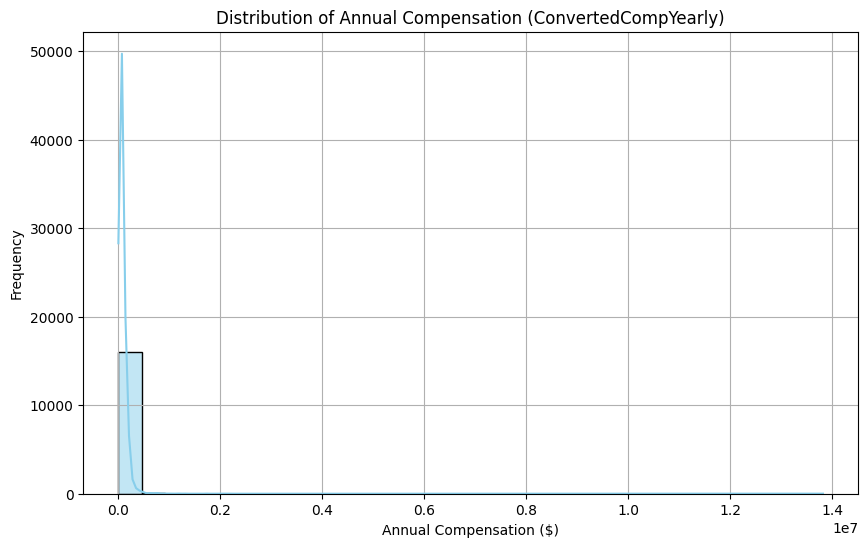

In [224]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(dtf['ConvertedCompYearly'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Annual Compensation (ConvertedCompYearly)')
plt.xlabel('Annual Compensation ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Explanation: A histogram gives an idea of the shape of the distribution (normal, skewed, etc.), which is crucial for determining the right statistical or machine learning models. A skewed distribution suggests that the model may need transformation or that compensation is heavily concentrated at certain values (e.g., lower salaries).

now let's remove the outliers and see the distribution of the target feature

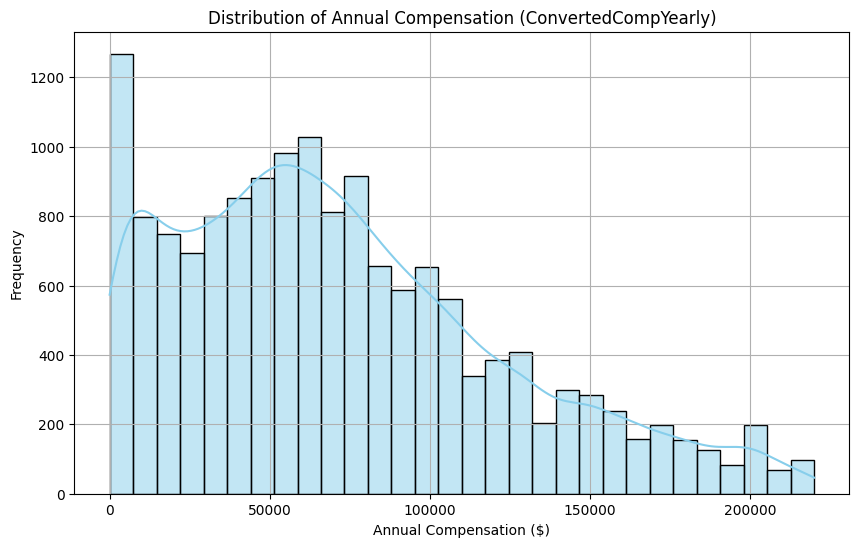

In [225]:

# Calculate Q1, Q3, and IQR
Q1 = dtf['ConvertedCompYearly'].quantile(0.25)
Q3 = dtf['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data
filtered_dtf = dtf[(dtf['ConvertedCompYearly'] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_dtf['ConvertedCompYearly'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Annual Compensation (ConvertedCompYearly)')
plt.xlabel('Annual Compensation ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### 2. Box Plot of ConvertedCompYearly by Work Experience (WorkExp)
Purpose: This box plot helps understand how annual compensation varies by work experience. It's useful to visualize the range of compensation and see if there's any noticeable trend across different experience levels.

Visualization: A box plot of ConvertedCompYearly grouped by WorkExp

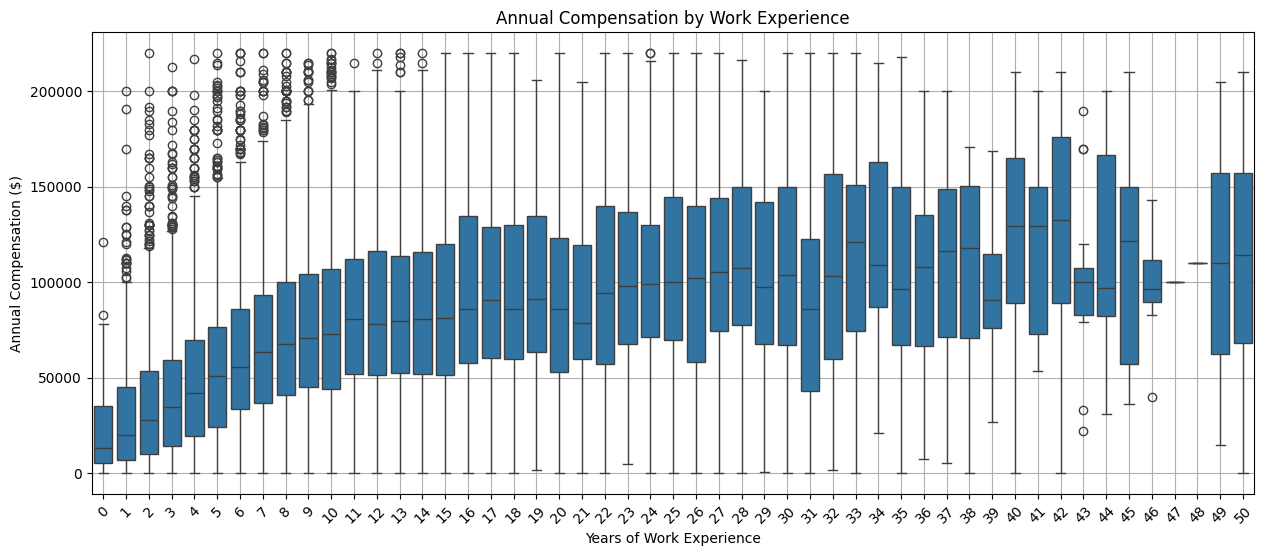

In [226]:

plt.figure(figsize=(15, 6))
sns.boxplot(x='WorkExp', y='ConvertedCompYearly', data=filtered_dtf)
plt.title('Annual Compensation by Work Experience')
plt.xlabel('Years of Work Experience')
plt.ylabel('Annual Compensation ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Explanation: The box plot shows the distribution of compensation within each experience level. Outliers, median, and interquartile range (IQR) are easily visible, helping identify how work experience influences annual compensation. The box plot also helps detect if some experience levels have a large spread or extreme outliers, which may need to be addressed in the model.

#3. Scatter Plot of ConvertedCompYearly vs YearsCodePro
Purpose: This scatter plot helps visualize the relationship between professional coding experience and compensation. If there's a linear relationship, this visualization will help to confirm the impact of coding experience on salary.

Visualization: A scatter plot of ConvertedCompYearly vs YearsCodePro

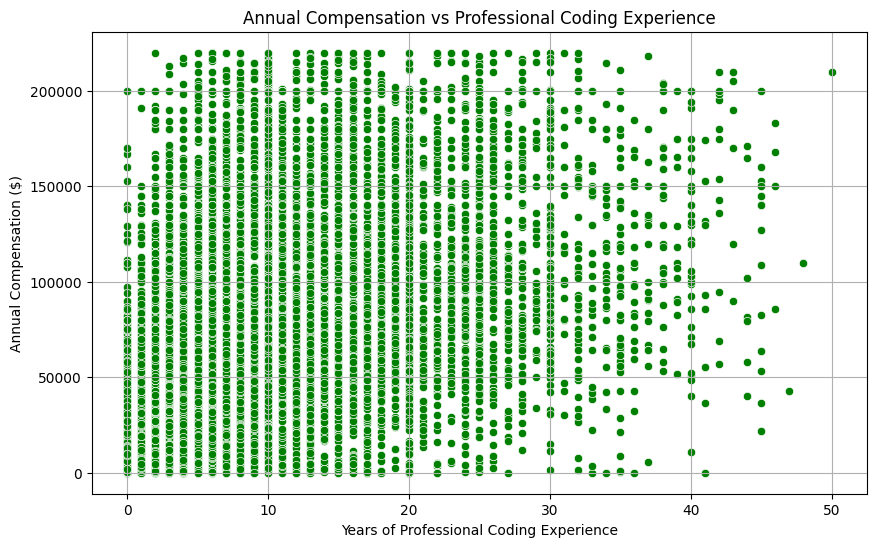

In [227]:
plt.figure(figsize=(10, 6))
filtered_dtf['YearsCodePro'] = pd.to_numeric(filtered_dtf['YearsCodePro'], errors='coerce')
filtered_dtf['YearsCodePro'] = filtered_dtf['YearsCodePro'].fillna(0)

filtered_dtf['YearsCode'] = pd.to_numeric(filtered_dtf['YearsCode'], errors='coerce')
filtered_dtf['YearsCode'] = filtered_dtf['YearsCode'].fillna(0)


sns.scatterplot(x='YearsCodePro', y='ConvertedCompYearly', data=filtered_dtf, color='green')
plt.title('Annual Compensation vs Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Annual Compensation ($)')
plt.grid(True)
plt.show()


Explanation: The scatter plot shows the linear relationship (or lack thereof) between professional coding experience and annual compensation. It’s useful for identifying trends, clusters, and correlations. If there's no significant relationship, it can inform the modeling process and feature engineering decisions.

#### 4. Correlation Heatmap of Key Features
Purpose: This heatmap shows the correlations between multiple features and the target variable (ConvertedCompYearly). Correlation is crucial for understanding how the various attributes relate to the target and identifying any strong predictors.

Visualization: A heatmap of the correlation matrix for key features, with a focus on ConvertedCompYearly.

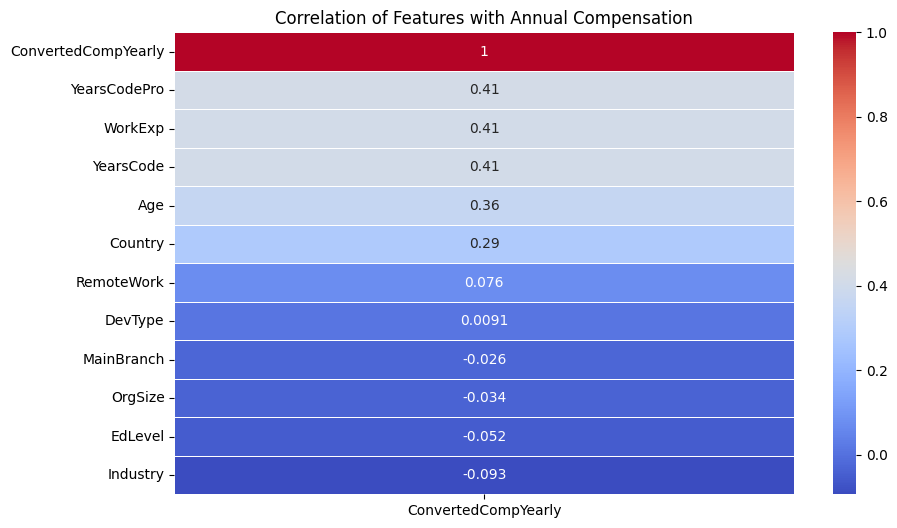

In [228]:

plt.figure(figsize=(10, 6))
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

encoded_dtf = filtered_dtf.copy()

for col in encoded_dtf.select_dtypes(include=["object", "category"]).columns:
    encoded_dtf[col] = label_encoder.fit_transform(filtered_dtf[col])
    
corr_matrix = encoded_dtf.corr()
sns.heatmap(corr_matrix[['ConvertedCompYearly']].sort_values(by='ConvertedCompYearly', ascending=False), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Features with Annual Compensation')
plt.show()


Explanation: The heatmap shows the correlation between variables and the target. A high positive or negative correlation with ConvertedCompYearly can indicate strong predictors for the model. Features like YearsCodePro, Age, and WorkExp could show significant relationships. This will guide feature selection and modeling strategies.

#### 5. Bar Plot of Average Compensation: Top 10 Countries with Most Respondents
Purpose: This bar plot will show the average compensation for the top 10 countries with the most respondents in the dataset. It will help you focus on the most represented countries in the survey and compare their average compensation.
Visualization: A bar plot with the average ConvertedCompYearly for the top 10 countries.

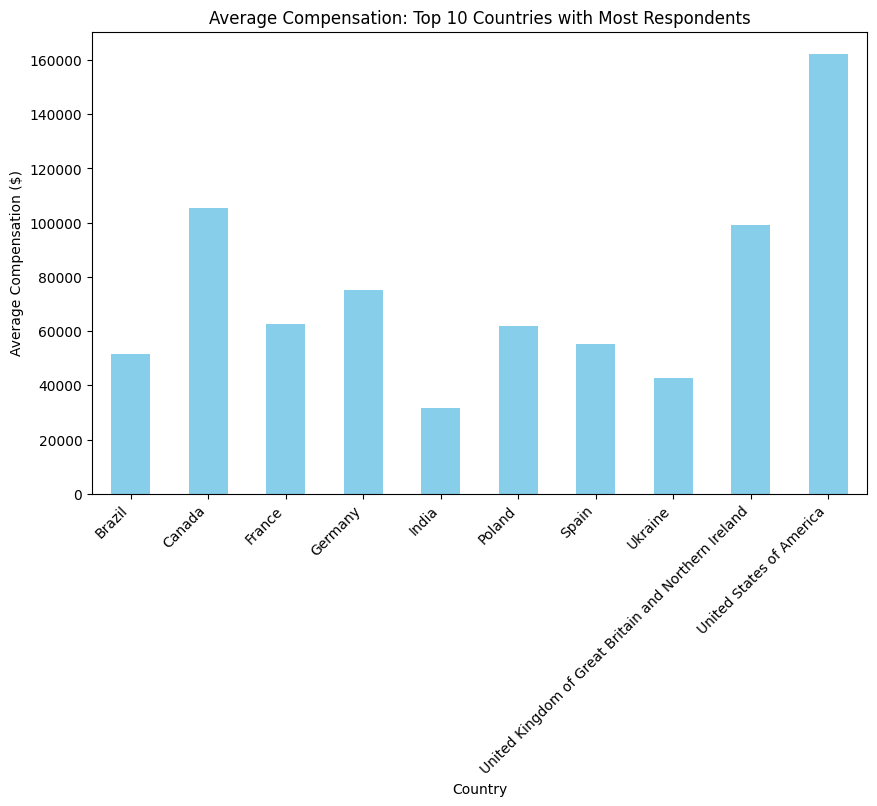

In [229]:
# Get the top 10 countries with the most respondents
top_10_countries = dtf['Country'].value_counts().nlargest(10).index

# Filter the data to include only those countries
top_10_dtf = dtf[dtf['Country'].isin(top_10_countries)]

# Calculate the average compensation for each of the top 10 countries
avg_compensation_top_10 = top_10_dtf.groupby('Country')['ConvertedCompYearly'].mean()

# Plot the bar plot
plt.figure(figsize=(10, 6))
avg_compensation_top_10.plot(kind='bar', color='skyblue')
plt.title('Average Compensation: Top 10 Countries with Most Respondents')
plt.xlabel('Country')
plt.ylabel('Average Compensation ($)')
plt.xticks(rotation=45, ha='right')
plt.show()


Explanation:
Purpose: This bar plot compares the average annual compensation across the top 10 countries with the most respondents in the survey.

Why It’s Significant: By focusing on the top 10 countries with the highest number of respondents, you can more clearly see how the U.S. and other countries compare in terms of compensation. It allows you to identify trends in salary levels across larger, more represented populations.

# 3. Basic Model Pipeline

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

categorical_columns = ['MainBranch','Age', 'RemoteWork', 'EdLevel', 'DevType', 'OrgSize', 'Country', 'Industry']
categorical_dtf =filtered_dtf.copy()

for col in categorical_columns:
    categorical_dtf[col] = label_encoder.fit_transform(categorical_dtf[col].astype(str))
    
categorical_dtf = categorical_dtf.fillna(0)

X = categorical_dtf.drop(columns=['ConvertedCompYearly'])  # Features
y = categorical_dtf['ConvertedCompYearly']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Squared Error (MSE): 1003645059.8246
Mean Absolute Error (MAE): 22861.7282
R-squared (R2): 0.6308


 # 4. Error Analysis


In [231]:
predictions = model.predict(X_test)

categorical_dtf.loc[X_test.index, 'PredictedComp'] = predictions

categorical_dtf['Residuals'] = categorical_dtf['ConvertedCompYearly'] - categorical_dtf['PredictedComp']


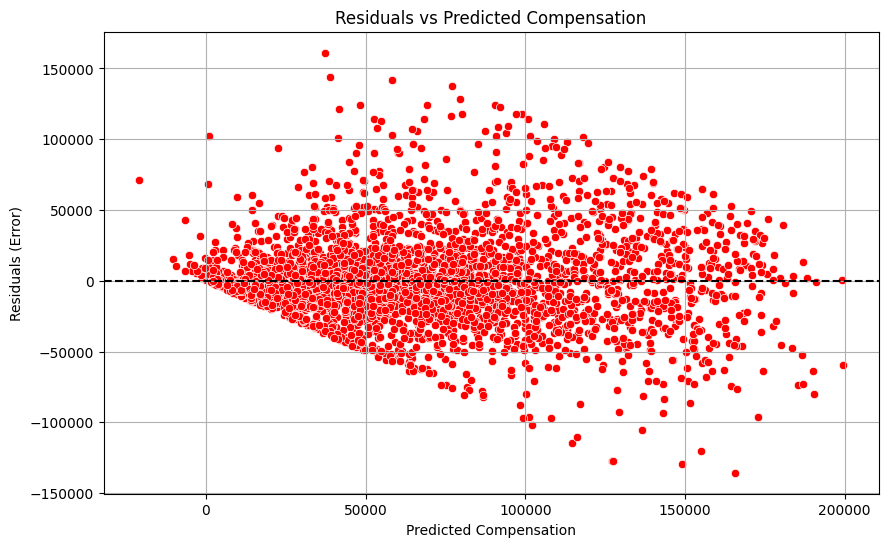

In [232]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=categorical_dtf['PredictedComp'], y=categorical_dtf['Residuals'], color='red')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals vs Predicted Compensation')
plt.xlabel('Predicted Compensation')
plt.ylabel('Residuals (Error)')
plt.grid(True)
plt.show()

In [233]:
# Check if residuals are mostly positive (underestimating) or negative (overestimating)
underestimating = categorical_dtf[categorical_dtf['Residuals'] > 0]
overestimating = categorical_dtf[categorical_dtf['Residuals'] < 0]

print(f"Underestimating samples: {underestimating.shape[0]}")
print(f"Overestimating samples: {overestimating.shape[0]}")


Underestimating samples: 1435
Overestimating samples: 1666


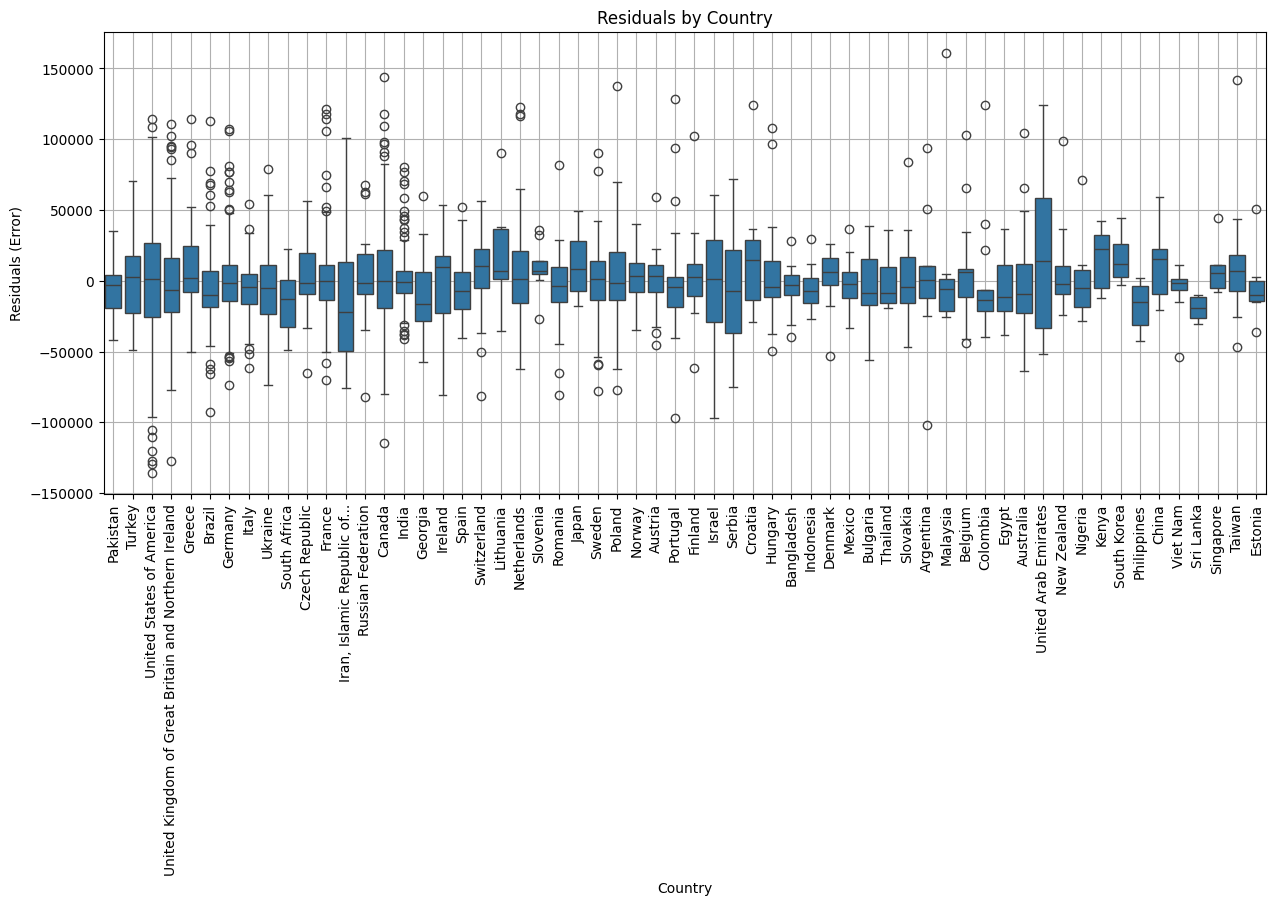

In [234]:

categorical_dtf['Country']= filtered_dtf['Country']

top_60_countries = categorical_dtf['Country'].value_counts().head(60).index

# Filter the DataFrame for the top 10 countries
top_60_countries_dtf = categorical_dtf[categorical_dtf['Country'].isin(top_60_countries)]
plt.figure(figsize=(15, 6))
sns.boxplot(x='Country', y='Residuals', data=top_60_countries_dtf)
plt.xticks(rotation=90)
plt.title('Residuals by Country')
plt.xlabel('Country')
plt.ylabel('Residuals (Error)')
plt.grid(True)
plt.show()




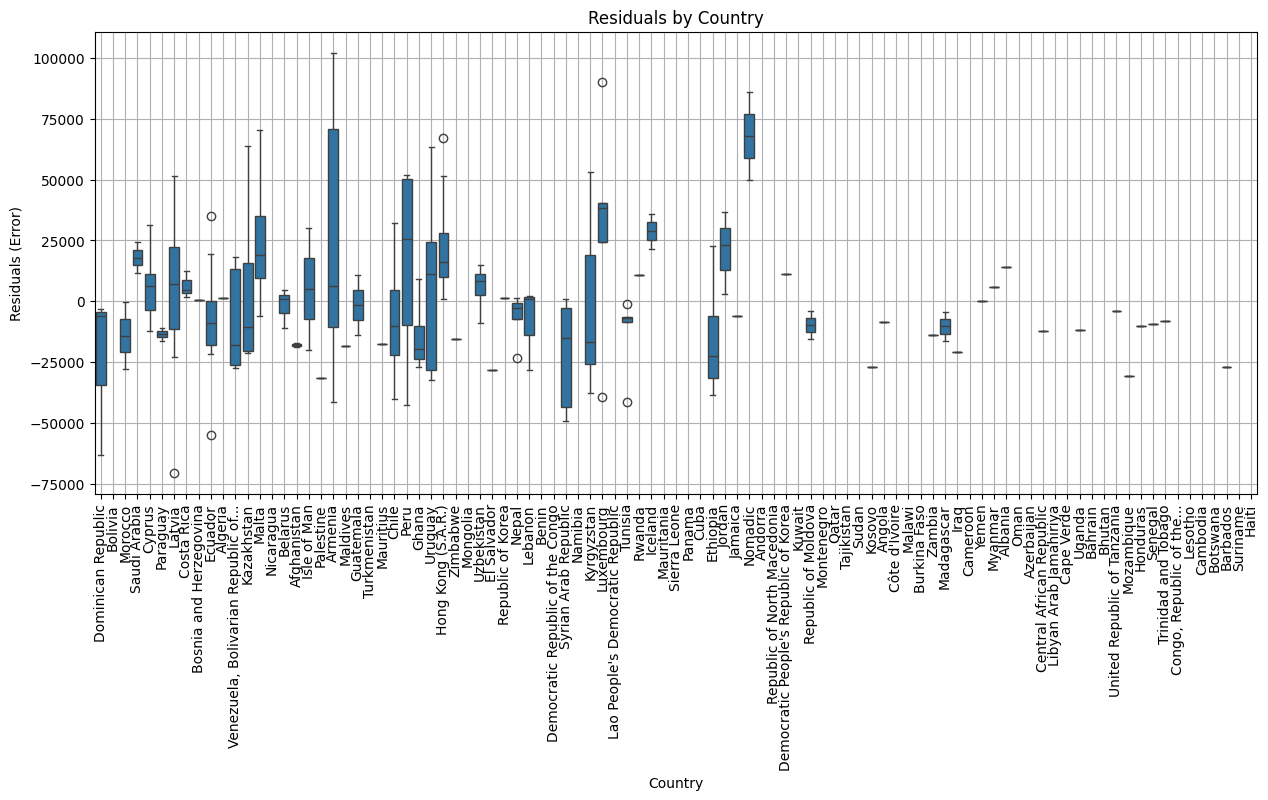

In [235]:

rest_countries_dtf = categorical_dtf[~categorical_dtf['Country'].isin(top_60_countries)]
plt.figure(figsize=(15, 6))
sns.boxplot(x='Country', y='Residuals', data=rest_countries_dtf)
plt.xticks(rotation=90)
plt.title('Residuals by Country')
plt.xlabel('Country')
plt.ylabel('Residuals (Error)')
plt.grid(True)
plt.show()

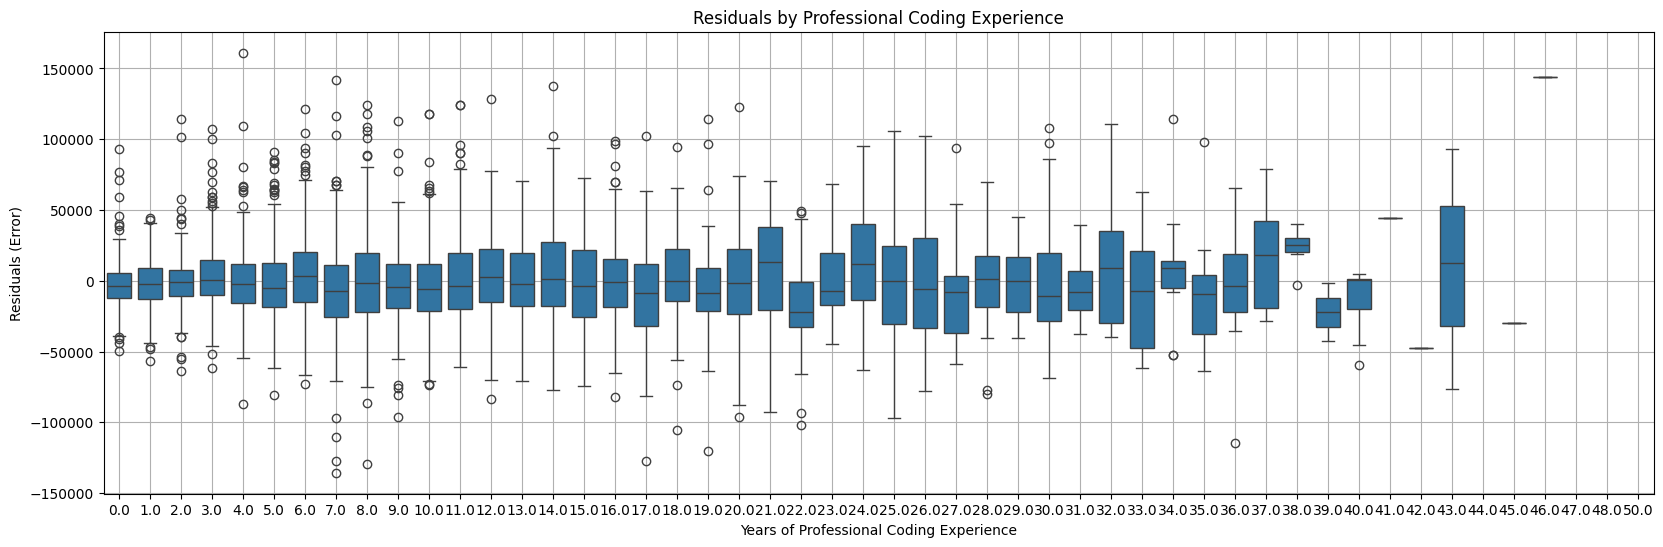

In [236]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='YearsCodePro', y='Residuals', data=categorical_dtf)
plt.title('Residuals by Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Residuals (Error)')
plt.grid(True)
plt.show()


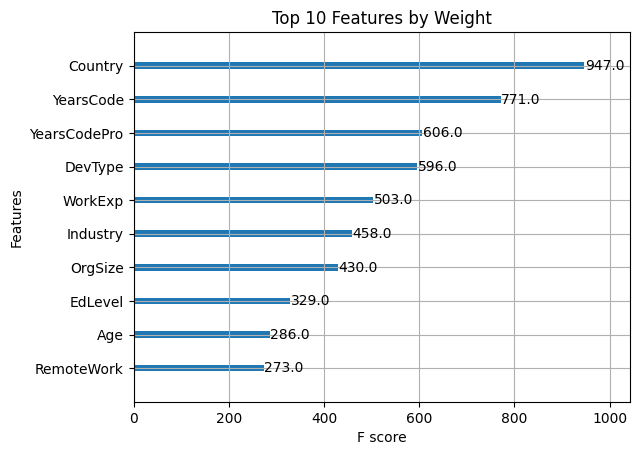

In [237]:
import xgboost as xgb
import matplotlib.pyplot as plt
xgb.plot_importance(model, importance_type='weight', max_num_features=10)
plt.title('Top 10 Features by Weight')
plt.show()


In [238]:

largest_residuals = categorical_dtf.sort_values(by='Residuals', ascending=False).head(20)


largest_residuals[['Country', 'YearsCodePro', 'ConvertedCompYearly', 'PredictedComp', 'Residuals']]


,Country,YearsCodePro,ConvertedCompYearly,PredictedComp,Residuals
ResponseId,,,,,
7246,Malaysia,4.00,198326,"37,242.91","161,083.09"
9076,Canada,46.00,183000,"38,969.80","144,030.20"
23043,Taiwan,7.00,200000,"58,176.75","141,823.25"
1041,Poland,14.00,214812,"76,928.88","137,883.12"
16350,Portugal,12.00,208000,"79,548.93","128,451.07"
23831,United Arab Emirates,8.00,215000,"90,605.95","124,394.05"
36971,Colombia,11.00,172597,"48,370.08","124,226.92"
4337,Croatia,11.00,193331,"69,232.04","124,098.96"
39849,Netherlands,20.00,214812,"92,058.48","122,753.52"


based on the analsis we will now ansewr the following questions:

On which items the model performs the worst?
The best?
Why do you think that is?

we can clearly see that generally the model prefom the worst on people form countries with low amount of responders .
the model prefom the best on people form countries with high amount of responders.
I think it's because it's easier to predict the salary of people from countries with high amount of responders because the model has more data to learn from.

Is the model mostly overestimating? underestimating?
Why?

It seems the model is preety balanced in terms of overestimating and underestimating.
I think it's because the model is trying to predict the salary based on the features and the features are not biased towards overestimating or underestimating the salary.

Which features have the largest Imact on the prediction?

by analysing the correlation heatmap we can see that the features that have the largest impact on the prediction are: YearsCodePro, Country, Age, WorkExp, and YearsCode.

are there any potential data issues that may affect the model performance?

The data contain outlines that may affect the model performance.
it maybe better to focus on the top 10 countries with the most responders to get a better model performance.

Find and Explain the biggest residual of the model on a single record.:

the biggest residual of the model on a single record is 161,083.09 and it can be explain by the fact that on average a guy from there make 85906.34851
and not 198326...
